## Part 1- Data Coding and Merging

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import NHL Team Data and Display
NHL_Team=pd.read_csv("Assignment Data/Week 2/NHL_team.csv")
display(NHL_Team[0:5])

,Unnamed: 0,tid,name,tname,lname,tricode,abbr,sname
0,1,1,Toronto Maple Leafs,Maple Leafs,Toronto,TOR,TOR,Toronto
1,2,2,Montréal Canadiens,Canadiens,Montréal,MTL,MTL,Montréal
2,3,4,Winnipeg Jets,Jets,Winnipeg,WPG,WPG,Winnipeg
3,4,5,Washington Capitals,Capitals,Washington,WSH,WSH,Washington
4,5,6,Chicago Blackhawks,Blackhawks,Chicago,CHI,CHI,Chicago


In [3]:
# Delete the following variables: “Unnamed:0”, “abbr”, “tname”, “lname”, and “sname”.
NHL_Team.drop(columns=["Unnamed: 0", "abbr", "tname", "lname", "sname"], axis=1, inplace=True)

#Rename the variable “name” to “team_name”.
NHL_Team= NHL_Team.rename(columns={'name': 'team_name'})
NHL_Team.head()

,tid,team_name,tricode
0,1,Toronto Maple Leafs,TOR
1,2,Montréal Canadiens,MTL
2,4,Winnipeg Jets,WPG
3,5,Washington Capitals,WSH
4,6,Chicago Blackhawks,CHI


In [4]:
#Import NHL Competition Data and Display Head
NHL_Competition=pd.read_csv("Assignment Data/Week 2/NHL_competition.csv")
NHL_Competition.head()

,Unnamed: 0,comp_id,year,type,name,tz,start,end
0,1,1,2013,2,2013 NHL Regular Season,ET,NaN,NaN
1,2,2,2017,2,2017 NHL Regular Season,ET,NaN,NaN
2,3,2453,2013,3,2013 NHL Playoff,ET,NaN,NaN
3,4,2541,2017,3,2017 NHL Playoff,ET,NaN,NaN
4,5,2661,2012,2,2012 NHL Regular Season,ET,NaN,NaN


In [5]:
# Delete the following variables: “Unnamed: 0”, “tz”, “start”, and “end”
NHL_Competition.drop(columns=['Unnamed: 0','tz','start','end'], axis=1, inplace=True)

#Rename the variable “name” to “competition_name”.
NHL_Competition= NHL_Competition.rename(columns={'name': 'competition_name'})
NHL_Competition.head()

,comp_id,year,type,competition_name
0,1,2013,2,2013 NHL Regular Season
1,2,2017,2,2017 NHL Regular Season
2,2453,2013,3,2013 NHL Playoff
3,2541,2017,3,2017 NHL Playoff
4,2661,2012,2,2012 NHL Regular Season


In [6]:
#Import NHL Game Data and Display Head
NHL_Game=pd.read_csv("Assignment Data/Week 2/NHL_game.csv")
NHL_Game.head()

,X,gid,comp_id,date,ascore,hscore,period,status,home_away,tid
0,1,37,2,10/7/2017,NaN,NaN,NaN,NaN,away,25
1,2,67,2,10/9/2017,NaN,NaN,NaN,NaN,away,29
2,3,154,1,10/14/2013,NaN,NaN,NaN,NaN,away,29
3,4,278,1,10/24/2013,NaN,NaN,NaN,NaN,away,53
4,5,291,1,10/25/2013,NaN,NaN,NaN,NaN,away,5


In [7]:
# delete X, period, status
NHL_Game.drop(columns=['X', 'period', 'status'], axis=1, inplace=True)
NHL_Game.head()

,gid,comp_id,date,ascore,hscore,home_away,tid
0,37,2,10/7/2017,NaN,NaN,away,25
1,67,2,10/9/2017,NaN,NaN,away,29
2,154,1,10/14/2013,NaN,NaN,away,29
3,278,1,10/24/2013,NaN,NaN,away,53
4,291,1,10/25/2013,NaN,NaN,away,5


In [8]:
#Import NHL PPPK Data and Display Head
NHL_PPPK=pd.read_csv("Assignment Data/Week 2/pp.pk.ppgf.csv")
NHL_PPPK.head()

,tricode,pp,pk,ppgf,competition_name
0,ANA,35,27,9.0,2010 NHL Playoff
1,BOS,126,116,22.0,2010 NHL Playoff
2,BUF,48,46,13.0,2010 NHL Playoff
3,CHI,27,39,6.0,2010 NHL Playoff
4,DET,59,55,6.0,2010 NHL Playoff


In [9]:
# Merge the dataframe “NHL_Team” into the dataframe “NHL_Game” by “tid.” 
# Continue to name the merged dataframe as “NHL_Game.”
NHL_Game= pd.merge(NHL_Game, NHL_Team, on='tid')
NHL_Game.head()

,gid,comp_id,date,ascore,hscore,home_away,tid,team_name,tricode
0,37,2,10/7/2017,NaN,NaN,away,25,Tampa Bay Lightning,TBL
1,1623,2,2/6/2018,NaN,NaN,away,25,Tampa Bay Lightning,TBL
2,2550,2541,4/23/2018,NaN,NaN,away,25,Tampa Bay Lightning,TBL
3,2649,2541,5/8/2018,NaN,NaN,away,25,Tampa Bay Lightning,TBL
4,3304,2661,3/6/2013,NaN,NaN,away,25,Tampa Bay Lightning,TBL


In [10]:
# Merge the dataframe “NHL_Competition” into the dataframe “NHL_Game” by “comp_id.” 
# Continue to name the merged dataframe as “NHL_Game.”
NHL_Game= pd.merge(NHL_Game, NHL_Competition, on='comp_id')
NHL_Game.head()

,gid,comp_id,date,ascore,hscore,home_away,tid,team_name,tricode,year,type,competition_name
0,37,2,10/7/2017,NaN,NaN,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season
1,1623,2,2/6/2018,NaN,NaN,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season
2,981,2,12/15/2017,4.0,1.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season
3,1607,2,2/4/2018,4.0,2.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season
4,2403,2,3/30/2018,7.0,3.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season


In [11]:
# In the merged “NHL_Game” dataframe, create a variable “hgd” to indicate the goal difference between home and away score (hscore – ascore) and 
# delete observations with missing value in the variable “hgd”.
NHL_Game['hgd']= NHL_Game.hscore - NHL_Game.ascore
NHL_Game.dropna(inplace=True)
NHL_Game.head(10)

,gid,comp_id,date,ascore,hscore,home_away,tid,team_name,tricode,year,type,competition_name,hgd
2,981,2,12/15/2017,4.0,1.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-3.0
3,1607,2,2/4/2018,4.0,2.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-2.0
4,2403,2,3/30/2018,7.0,3.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-4.0
5,1541,2,1/31/2018,1.0,3.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,2.0
6,1243,2,1/5/2018,1.0,2.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1.0
7,1570,2,2/2/2018,7.0,4.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-3.0
8,2314,2,3/24/2018,1.0,2.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1.0
9,709,2,11/26/2017,2.0,5.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,3.0
10,196,2,10/19/2017,2.0,0.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-2.0
11,1729,2,2/14/2018,3.0,5.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,2.0


In [12]:
# Convert the type of the “date” variable from “object” to “datetime.”
import datetime
NHL_Game['date']= pd.to_datetime(NHL_Game.date)

In [13]:
# Sort the NHL games by “date” and show the first 15 observations.
NHL_Game.sort_values(by='date', inplace=True)
NHL_Game.head(15)

,gid,comp_id,date,ascore,hscore,home_away,tid,team_name,tricode,year,type,competition_name,hgd
8424,5666,5662,2010-10-07,4.0,3.0,away,66,Carolina Hurricanes,CAR,2010,2,2010 NHL Regular Season,-1.0
9944,5664,5662,2010-10-07,3.0,2.0,home,8,Pittsburgh Penguins,PIT,2010,2,2010 NHL Regular Season,-1.0
9006,5664,5662,2010-10-07,3.0,2.0,away,14,Philadelphia Flyers,PHI,2010,2,2010 NHL Regular Season,-1.0
9125,5666,5662,2010-10-07,4.0,3.0,home,35,Minnesota Wild,MIN,2010,2,2010 NHL Regular Season,-1.0
8814,5662,5662,2010-10-07,2.0,3.0,home,1,Toronto Maple Leafs,TOR,2010,2,2010 NHL Regular Season,1.0
8697,5662,5662,2010-10-07,2.0,3.0,away,2,Montréal Canadiens,MTL,2010,2,2010 NHL Regular Season,1.0
9742,5672,5662,2010-10-08,3.0,2.0,away,16,San Jose Sharks,SJS,2010,2,2010 NHL Regular Season,-1.0
9546,5681,5662,2010-10-08,2.0,1.0,home,32,Ottawa Senators,OTT,2010,2,2010 NHL Regular Season,-1.0
8975,5679,5662,2010-10-08,0.0,4.0,home,18,Detroit Red Wings,DET,2010,2,2010 NHL Regular Season,4.0
10004,5668,5662,2010-10-08,3.0,4.0,away,6,Chicago Blackhawks,CHI,2010,2,2010 NHL Regular Season,1.0


In [14]:
# Create two dataframes that separate the “NHL_Game” dataframe by home and away games. 
# Name them “NHL_Home” and “NHL_Away”, respectively.
# Rename variables:
# For away games, rename “ascore” to “goals_for”; rename “hscore” to “goals_against”
# For home games, rename “hscore” to “goals_for”; rename “ascore” to “goals_against” 
# Create a “win” variable that equals to 1 if the team won the game; 0 if the team lost the game;
# and 0.5 if it was a draw. 

NHL_Home= NHL_Game[NHL_Game.home_away == 'home']
NHL_Away= NHL_Game[NHL_Game.home_away == 'away']

NHL_Home= NHL_Home.rename(columns={'hscore': 'goals_for', 'ascore': 'goals_against'})
NHL_Away= NHL_Away.rename(columns={'ascore': 'goals_for', 'hscore': 'goals_against'})

NHL_Home['win']= np.where(NHL_Home.goals_for > NHL_Home.goals_against, 1, np.where(NHL_Home.goals_for == NHL_Home.goals_against, .5, 0))
NHL_Away['win']= np.where(NHL_Home.goals_for > NHL_Home.goals_against, 1, np.where(NHL_Home.goals_for == NHL_Home.goals_against, .5, 0))

NHL_Home.head()

,gid,comp_id,date,goals_against,goals_for,home_away,tid,team_name,tricode,year,type,competition_name,hgd,win
9944,5664,5662,2010-10-07,3.0,2.0,home,8,Pittsburgh Penguins,PIT,2010,2,2010 NHL Regular Season,-1.0,0.0
9125,5666,5662,2010-10-07,4.0,3.0,home,35,Minnesota Wild,MIN,2010,2,2010 NHL Regular Season,-1.0,0.0
8814,5662,5662,2010-10-07,2.0,3.0,home,1,Toronto Maple Leafs,TOR,2010,2,2010 NHL Regular Season,1.0,1.0
9546,5681,5662,2010-10-08,2.0,1.0,home,32,Ottawa Senators,OTT,2010,2,2010 NHL Regular Season,-1.0,0.0
8975,5679,5662,2010-10-08,0.0,4.0,home,18,Detroit Red Wings,DET,2010,2,2010 NHL Regular Season,4.0,1.0


In [15]:
# Append the “NHL_Home” and “NHL_Away” dataframes to be the new “NHL_Game” dataframe.
#NHL_Game= pd.concat(NHL_Home, NHL_Away, on='team_name')
NHL_Game=pd.concat([NHL_Home, NHL_Away], axis=0)
NHL_Game.head()

,comp_id,competition_name,date,gid,goals_against,goals_for,hgd,home_away,team_name,tid,tricode,type,win,year
9944,5662,2010 NHL Regular Season,2010-10-07,5664,3.0,2.0,-1.0,home,Pittsburgh Penguins,8,PIT,2,0.0,2010
9125,5662,2010 NHL Regular Season,2010-10-07,5666,4.0,3.0,-1.0,home,Minnesota Wild,35,MIN,2,0.0,2010
8814,5662,2010 NHL Regular Season,2010-10-07,5662,2.0,3.0,1.0,home,Toronto Maple Leafs,1,TOR,2,1.0,2010
9546,5662,2010 NHL Regular Season,2010-10-08,5681,2.0,1.0,-1.0,home,Ottawa Senators,32,OTT,2,0.0,2010
8975,5662,2010 NHL Regular Season,2010-10-08,5679,0.0,4.0,4.0,home,Detroit Red Wings,18,DET,2,1.0,2010


In [17]:
# Generate a team level dataframe that aggregates the total number of games won, the total number of “goals_for” 
# and “goals_against” for each team in each competition (i.e. grouped by tid, competition_name and type). 
# Name this new dataframe “NHL_Team_Stats”. 
# Make sure to convert the indexes of the new dataframe back as  variables. 
NHL_Team_Stats = NHL_Game.groupby(['tid','competition_name','type'])['win','goals_for','goals_against'].sum().reset_index()
NHL_Team_Stats.head()

,tid,competition_name,type,win,goals_for,goals_against
0,1,2010 NHL Regular Season,2,41.5,223.0,259.0
1,1,2011 NHL Regular Season,2,15.0,129.0,129.0
2,1,2012 NHL Playoff,3,4.0,18.0,22.0
3,1,2012 NHL Regular Season,2,26.0,144.0,129.0
4,1,2013 NHL Regular Season,2,48.0,231.0,250.0


In [18]:
# Create a dataframe “NHL_Game_Count” that include the total number of games played by each team in each competition 
# (i.e. grouped by tid, competition_name and type).
# Name this new variable in the dataframe “game_count”.
NHL_Game_Count=NHL_Game.groupby(['tid','competition_name','type']).size().reset_index(name='game_count')
display(NHL_Game_Count[0:10])

,tid,competition_name,type,game_count
0,1,2010 NHL Regular Season,2,82
1,1,2011 NHL Regular Season,2,40
2,1,2012 NHL Playoff,3,7
3,1,2012 NHL Regular Season,2,46
4,1,2013 NHL Regular Season,2,79
5,1,2014 NHL Regular Season,2,78
6,1,2015 NHL Regular Season,2,79
7,1,2016 NHL Playoff,3,6
8,1,2016 NHL Regular Season,2,82
9,1,2017 NHL Playoff,3,7


In [19]:
# Merge dataframes. Merge the “NHL_Game_Count” dataframe into the “NHL_Team_Stats” dataframe by “tid”, 
# “competition_name”, and “type”. Continue to name the merged dataframe “NHL_Team_Stats”.
# Merge the “NHL_Team” dataframe into the “NHL_Team_Stats” dataframe by “tid”. 
# Continue to name the merged dataframe “NHL_Team_Stats”.
NHL_Team_Stats=pd.merge(NHL_Team_Stats, NHL_Game_Count, on=['tid','competition_name','type'])
NHL_Team_Stats=pd.merge(NHL_Team_Stats, NHL_Team, on=['tid'])
NHL_Team_Stats.head()

,tid,competition_name,type,win,goals_for,goals_against,game_count,team_name,tricode
0,1,2010 NHL Regular Season,2,41.5,223.0,259.0,82,Toronto Maple Leafs,TOR
1,1,2011 NHL Regular Season,2,15.0,129.0,129.0,40,Toronto Maple Leafs,TOR
2,1,2012 NHL Playoff,3,4.0,18.0,22.0,7,Toronto Maple Leafs,TOR
3,1,2012 NHL Regular Season,2,26.0,144.0,129.0,46,Toronto Maple Leafs,TOR
4,1,2013 NHL Regular Season,2,48.0,231.0,250.0,79,Toronto Maple Leafs,TOR


In [19]:
#Import NHL PPPK Data and Display Head
NHL_PPPK=pd.read_csv("Assignment Data/Week 2/pp.pk.ppgf.csv")
NHL_PPPK.head()

,tricode,pp,pk,ppgf,competition_name
0,ANA,35,27,9.0,2010 NHL Playoff
1,BOS,126,116,22.0,2010 NHL Playoff
2,BUF,48,46,13.0,2010 NHL Playoff
3,CHI,27,39,6.0,2010 NHL Playoff
4,DET,59,55,6.0,2010 NHL Playoff


In [20]:
#Merge the “NHL_PPPK” dataframe into the “NHL_Team_Stats” dataframe by “tricode” and “competition_name”.
NHL_Team_Stats=pd.merge(NHL_PPPK, NHL_Team_Stats, on=['tricode','competition_name'])
NHL_Team_Stats.head()

,tricode,pp,pk,ppgf,competition_name,tid,type,win,goals_for,goals_against,game_count,team_name
0,ANA,35,27,9.0,2010 NHL Playoff,21,3,3.0,19.0,22.0,6,Anaheim Ducks
1,BOS,126,116,22.0,2010 NHL Playoff,20,3,16.0,76.0,48.0,24,Boston Bruins
2,BUF,48,46,13.0,2010 NHL Playoff,17,3,2.0,17.0,22.0,7,Buffalo Sabres
3,CHI,27,39,6.0,2010 NHL Playoff,6,3,5.0,22.0,16.0,7,Chicago Blackhawks
4,DET,59,55,6.0,2010 NHL Playoff,18,3,6.0,36.0,27.0,11,Detroit Red Wings


In [21]:
# Create new variables in the “NHL_Team_Stats” dataframe.
# Winning percentage (“win_pct”)=”win”/ total number of games played
NHL_Team_Stats['win_pct']= NHL_Team_Stats.win/ NHL_Team_Stats.game_count
# Average goals for per game (“avg_gf”)=total number of goals for / total number of games played     
NHL_Team_Stats['avg_gf']=NHL_Team_Stats['goals_for']/NHL_Team_Stats['game_count']
# Average goals against per game (“avg_ga”)=total number of goals against / total number of games played
NHL_Team_Stats['avg_ga']=NHL_Team_Stats['goals_against']/NHL_Team_Stats['game_count']

In [22]:
NHL_Team_Stats['win_pct'].describe()

count    369.000000
mean       0.533641
std        0.131439
min        0.000000
25%        0.487500
50%        0.541667
75%        0.600000
max        0.857143
Name: win_pct, dtype: float64

In [25]:
# In the NHL_Competition dataframe, the variable type indicates the type of competition. 
# type=2 means it is regular season competition.
# Create a dataframe (NHL_Team_R_Stats) that contains team statistics for games only during regular seasons.
NHL_Team_R_Stats=NHL_Team_Stats[(NHL_Team_Stats.type == 2)]
NHL_Team_R_Stats.head()

,tricode,pp,pk,ppgf,competition_name,tid,type,win,goals_for,goals_against,game_count,team_name,win_pct,avg_gf,avg_ga
16,ANA,401,378,92.0,2010 NHL Regular Season,21,2,38.0,227.0,225.0,78,Anaheim Ducks,0.487179,2.910256,2.884615
17,ATL,338,341,35.0,2010 NHL Regular Season,11366,2,41.5,223.0,263.0,79,Atlanta Thrashers,0.525316,2.822785,3.329114
18,BOS,368,370,74.0,2010 NHL Regular Season,20,2,40.5,250.0,200.0,82,Boston Bruins,0.493902,3.048780,2.439024
19,BUF,393,364,83.0,2010 NHL Regular Season,17,2,39.5,251.0,235.0,82,Buffalo Sabres,0.481707,3.060976,2.865854
20,CAR,338,427,79.0,2010 NHL Regular Season,66,2,44.5,239.0,242.0,82,Carolina Hurricanes,0.542683,2.914634,2.951220


## Part 2 - Descriptive and Summary Analyses

In [27]:
# create summary stats for goals_for
print(NHL_Game.goals_for.describe())
NHL_Game.groupby('home_away')['goals_against'].describe()

count    18506.000000
mean         2.825894
std          1.654729
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: goals_for, dtype: float64


,count,mean,std,min,25%,50%,75%,max
home_away,,,,,,,,
away,9253.0,2.961958,1.688463,0.0,2.0,3.0,4.0,10.0
home,9253.0,2.689830,1.608916,0.0,1.0,3.0,4.0,10.0


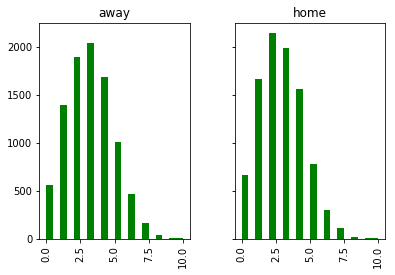

In [28]:
import matplotlib.pyplot as plt 
NHL_Game.hist(by='home_away', column='goals_against', color='green', bins=20, sharex=True, sharey=True)
plt.show()

## Part 3 - Correlation Analyses


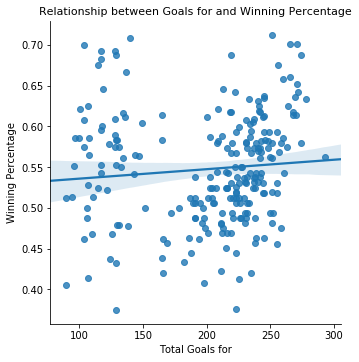

In [31]:
sns.lmplot(x='goals_for', y='win_pct', data=NHL_Team_R_Stats)
plt.xlabel('Total Goals for')
plt.ylabel('Winning Percentage')
plt.title("Relationship between Goals for and Winning Percentage", fontsize=11)
plt.savefig('scatter_gf_winpct.png')

In [32]:
# "38.Calulate the correlation coefficient between total _goals for_ and winning percentage."
NHL_Team_R_Stats['goals_for'].corr(NHL_Team_R_Stats['win_pct'])

0.08802448909471128

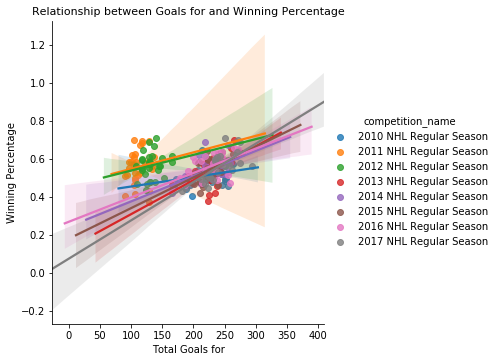

In [33]:
sns.lmplot(x='goals_for', y='win_pct', hue='competition_name', data=NHL_Team_R_Stats)
plt.xlabel('Total Goals for')
plt.ylabel('Winning Percentage')
plt.title("Relationship between Goals for and Winning Percentage", fontsize=11)
plt.savefig('scatter_gf_winpct_comp.png')

In [34]:
NHL_Team_R_Stats=NHL_Team_R_Stats[(NHL_Team_R_Stats.competition_name != '2011 NHL Regular Season')&(NHL_Team_R_Stats.competition_name != '2012 NHL Regular Season')]

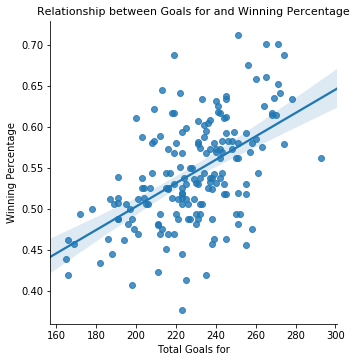

In [35]:
sns.lmplot(x='goals_for', y='win_pct',  data=NHL_Team_R_Stats)
plt.xlabel('Total Goals for')
plt.ylabel('Winning Percentage')
plt.title("Relationship between Goals for and Winning Percentage", fontsize=11)
plt.savefig('scatter_gf_winpct_new.png')

In [36]:
NHL_Team_R_Stats['goals_for'].corr(NHL_Team_R_Stats['win_pct'])

0.5411136956808142

## Uncomment this Section once your assignment is complete

In [ ]:
#Save Dataframes as .csv files
#NHL_Game.to_csv("NHL_Game2.csv", index=False)
#NHL_Team_Stats.to_csv("NHL_Team_Stats.csv", index=False)
#NHL_Team_R_Stats.to_csv("NHL_Team_R_Stats.csv", index=False)